In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Performance results from the MoNuSeg dataset**

In [1]:
!cp /content/drive/MyDrive/4-MonuseG/history_pkl/AttentionUNet_model_training_history.pkl /content
!cp /content/drive/MyDrive/4-MonuseG/history_pkl/DanNucNet_model_training_history.pkl /content
!cp /content/drive/MyDrive/4-MonuseG/history_pkl/FF_UNet_model_training_history.pkl /content
!cp /content/drive/MyDrive/4-MonuseG/history_pkl/att_unetpp_model_training_history.pkl /content
!cp /content/drive/MyDrive/4-MonuseG/history_pkl/base_unet_training_history.pkl /content
!cp /content/drive/MyDrive/4-MonuseG/history_pkl/deep_unet_training_history.pkl /content
!cp /content/drive/MyDrive/4-MonuseG/history_pkl/inception_unet_training_history.pkl /content
!cp /content/drive/MyDrive/4-MonuseG/history_pkl/nuclei_segnet_training_history.pkl /content
!cp /content/drive/MyDrive/4-MonuseG/history_pkl/ra_unet_training_history.pkl /content
!cp /content/drive/MyDrive/4-MonuseG/history_pkl/resunet_model_training_history.pkl /content
!cp /content/drive/MyDrive/4-MonuseG/history_pkl/sa_unet_training_history.pkl /content
!cp /content/drive/MyDrive/4-MonuseG/history_pkl/transres_unet_training_history.pkl /content
!cp /content/drive/MyDrive/4-MonuseG/history_pkl/unet_resnet_101_model_training_history.pkl /content
!cp /content/drive/MyDrive/4-MonuseG/history_pkl/unet_vgg16_model_training_history.pkl /content
!cp /content/drive/MyDrive/4-MonuseG/history_pkl/unetcbam_model_training_history.pkl /content

In [2]:
import pickle
from tabulate import tabulate

file_paths = [
    "/content/unetcbam_model_training_history.pkl",
    "/content/unet_vgg16_model_training_history.pkl",
    "/content/unet_resnet_101_model_training_history.pkl",
    "/content/transres_unet_training_history.pkl",
    "/content/sa_unet_training_history.pkl",
    "/content/resunet_model_training_history.pkl",
    "/content/ra_unet_training_history.pkl",
    "/content/nuclei_segnet_training_history.pkl",
    "/content/inception_unet_training_history.pkl",
    "/content/deep_unet_training_history.pkl",
    "/content/base_unet_training_history.pkl",
    "/content/att_unetpp_model_training_history.pkl",
    "/content/FF_UNet_model_training_history.pkl",
    "/content/DanNucNet_model_training_history.pkl",
    "/content/AttentionUNet_model_training_history.pkl"
]

model_names = [
    "unetcbam_model",
    "unet_vgg16_model",
    "unet_resnet_101_model",
    "transres_unet",
    "sa_unet",
    "resunet_model",
    "ra_unet",
    "nuclei_segnet",
    "inception_unet",
    "deep_unet",
    "base_unet",
    "att_unetpp_model",
    "FF_UNet_model",
    "DanNucNet_model",
    "AttentionUNet_model"
]

models_data = []

for file_path in file_paths:
    with open(file_path, 'rb') as file:
        history = pickle.load(file)
        models_data.append(history)

results = []

for i, model_data in enumerate(models_data):
    model_name = model_names[i]
    data = [
        model_name,
        model_data['loss'][-1],
        model_data['accuracy'][-1],
        model_data['dice_coef'][-1],
        model_data['f1_score'][-1],
        model_data['recall'][-1],
        model_data['precision'][-1],
        model_data['mean_iou'][-1],
        model_data['sensitivity'][-1]
    ]
    results.append(data)

headers = [
    "Model Name",
    "Loss",
    "Accuracy",
    "Dice Coef",
    "F1 Score",
    "Recall",
    "Precision",
    "Mean IOU",
    "Sensitivity"
]

table = tabulate(results, headers, tablefmt="pretty")
print(table)

+-----------------------+---------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|      Model Name       |        Loss         |      Accuracy      |     Dice Coef      |      F1 Score      |       Recall       |     Precision      |      Mean IOU      |    Sensitivity     |
+-----------------------+---------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|    unetcbam_model     | 0.1612040102481842  |  0.7843017578125   | 0.7980409264564514 | 0.8092905879020691 | 0.8065133094787598 | 0.8122377395629883 | 0.6652965545654297 | 0.8065133094787598 |
|   unet_vgg16_model    | 0.1293436586856842  | 0.789021372795105  | 0.8416781425476074 | 0.8469487428665161 | 0.8447871208190918 | 0.8492646217346191 | 0.7163490056991577 | 0.8447871208190918 |
| unet_resnet_101_model |

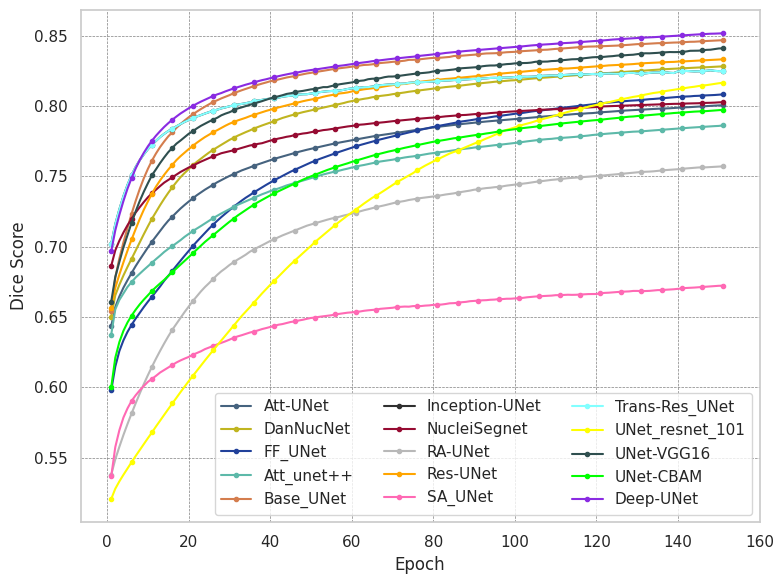

In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#
file_paths = [
    "/content/AttentionUNet_model_training_history.pkl",
    "/content/DanNucNet_model_training_history.pkl",
    "/content/FF_UNet_model_training_history.pkl",
    "/content/att_unetpp_model_training_history.pkl",
    "/content/base_unet_training_history.pkl",
    "/content/inception_unet_training_history.pkl",
    "/content/nuclei_segnet_training_history.pkl",
    "/content/ra_unet_training_history.pkl",
    "/content/resunet_model_training_history.pkl",
    "/content/sa_unet_training_history.pkl",
    "/content/transres_unet_training_history.pkl",
    "/content/unet_resnet_101_model_training_history.pkl",
    "/content/unet_vgg16_model_training_history.pkl",
    "/content/unetcbam_model_training_history.pkl",
    "/content/deep_unet_training_history.pkl"
]

model_names = [
    "Att-UNet",
    "DanNucNet",
    "FF_UNet",
    "Att_unet++",
    "Base_UNet",
    "Inception-UNet",
    "NucleiSegnet",
    "RA-UNet",
    "Res-UNet",
    "SA_UNet",
    "Trans-Res_UNet",
    "UNet_resnet_101",
    "UNet-VGG16",
    "UNet-CBAM",
    "Deep-UNet"
]

def load_training_history(file_path):
    with open(file_path, 'rb') as file:
        history = pickle.load(file)
    return history

# Загрузка истории обучения для каждой модели
histories = [load_training_history(file_path) for file_path in file_paths]

# Определяем максимальное количество эпох среди всех моделей
max_epochs = max(len(history['dice_coef']) for history in histories)

# Создаем график
plt.figure(figsize=(8, 6))

colors = ['#46637F', '#C0B520', '#21419A', '#5DB9A9', '#D47D4E', '#303030', '#960B32', '#B8B8B8', '#FFA500', '#FF69B4', '#82FFFF', '#FFFF00', '#2F4F4F', '#00FF00', '#8A2BE2']
# Настройка стилей Seaborn с новой палитрой
sns.set(style="whitegrid", palette=sns.color_palette(colors))

for i, history in enumerate(histories):
    # Используем сглаживание с помощью numpy.convolve для улучшения визуализации
    smooth_dice_coef = np.convolve(history['dice_coef'], np.ones(10)/10, mode='valid')
    epochs = np.arange(1, len(smooth_dice_coef) + 1)

    # Заполняем NaN после завершения обучения
    extended_epochs = np.arange(1, max_epochs + 1)
    extended_smooth_dice_coef = np.full(max_epochs, np.nan)
    extended_smooth_dice_coef[:len(smooth_dice_coef)] = smooth_dice_coef

    plt.plot(extended_epochs, extended_smooth_dice_coef, 'o-', label=model_names[i], markersize=3, markevery=5, color=colors[i])


plt.xlabel('Epoch')
plt.ylabel('Dice Score')
plt.legend(ncol=3)

# Изменение цвета и стиля сетки
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Установка нужных меток по оси X
plt.xticks(np.arange(0, max_epochs + 1, 20))

plt.tight_layout()

# Отображение графика
plt.show()

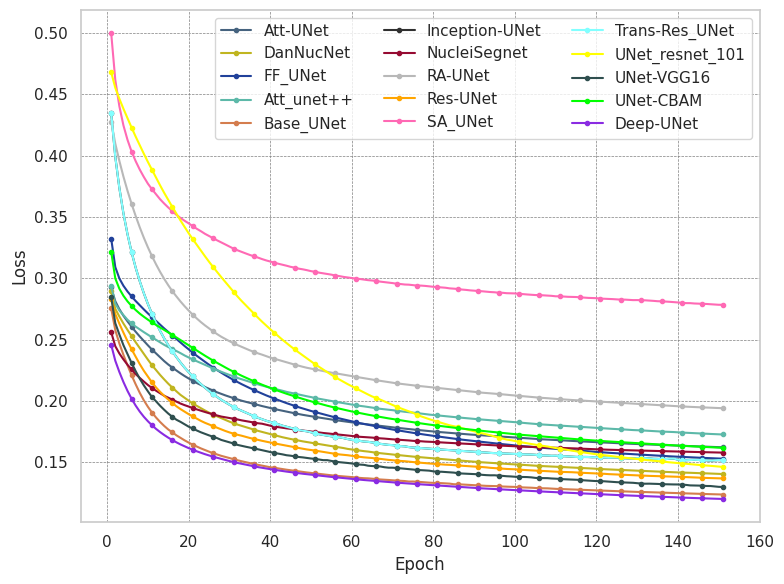

In [4]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

file_paths = [
    "/content/AttentionUNet_model_training_history.pkl",
    "/content/DanNucNet_model_training_history.pkl",
    "/content/FF_UNet_model_training_history.pkl",
    "/content/att_unetpp_model_training_history.pkl",
    "/content/base_unet_training_history.pkl",
    "/content/inception_unet_training_history.pkl",
    "/content/nuclei_segnet_training_history.pkl",
    "/content/ra_unet_training_history.pkl",
    "/content/resunet_model_training_history.pkl",
    "/content/sa_unet_training_history.pkl",
    "/content/transres_unet_training_history.pkl",
    "/content/unet_resnet_101_model_training_history.pkl",
    "/content/unet_vgg16_model_training_history.pkl",
    "/content/unetcbam_model_training_history.pkl",
    "/content/deep_unet_training_history.pkl"
]

model_names = [
    "Att-UNet",
    "DanNucNet",
    "FF_UNet",
    "Att_unet++",
    "Base_UNet",
    "Inception-UNet",
    "NucleiSegnet",
    "RA-UNet",
    "Res-UNet",
    "SA_UNet",
    "Trans-Res_UNet",
    "UNet_resnet_101",
    "UNet-VGG16",
    "UNet-CBAM",
    "Deep-UNet"
]

def load_training_history(file_path):
    with open(file_path, 'rb') as file:
        history = pickle.load(file)
    return history

# Загрузка истории обучения для каждой модели
histories = [load_training_history(file_path) for file_path in file_paths]

# Определяем максимальное количество эпох среди всех моделей
max_epochs = max(len(history['loss']) for history in histories)

#
plt.figure(figsize=(8, 6))

colors = ['#46637F', '#C0B520', '#21419A', '#5DB9A9', '#D47D4E', '#303030', '#960B32', '#B8B8B8', '#FFA500', '#FF69B4', '#82FFFF', '#FFFF00', '#2F4F4F', '#00FF00', '#8A2BE2']

sns.set(style="whitegrid", palette=sns.color_palette(colors))

for i, history in enumerate(histories):
    #
    smooth_loss = np.convolve(history['loss'], np.ones(10)/10, mode='valid')
    epochs = np.arange(1, len(smooth_loss) + 1)

    #
    extended_epochs = np.arange(1, max_epochs + 1)
    extended_smooth_loss = np.full(max_epochs, np.nan)
    extended_smooth_loss[:len(smooth_loss)] = smooth_loss

    plt.plot(extended_epochs, extended_smooth_loss, 'o-', label=model_names[i], markersize=3, markevery=5, color=colors[i])

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(ncol=3)

# Изменение цвета и стиля сетки
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Установка нужных меток по оси X
plt.xticks(np.arange(0, max_epochs + 1, 20))

plt.tight_layout()

# Отображение графика
plt.show()

**Performance results from the CoNSep dataset**

In [2]:
!cp /content/drive/MyDrive/3-CONSEP!/history_pkl/AttentionUNet_model_training_history.pkl /content
!cp /content/drive/MyDrive/3-CONSEP!/history_pkl/DanNucNet_model_training_history.pkl /content
!cp /content/drive/MyDrive/3-CONSEP!/history_pkl/FF_UNet_model_training_history.pkl /content
!cp /content/drive/MyDrive/3-CONSEP!/history_pkl/att_unetpp_model_training_history.pkl /content
!cp /content/drive/MyDrive/3-CONSEP!/history_pkl/base_unet_training_history.pkl /content
!cp /content/drive/MyDrive/3-CONSEP!/history_pkl/inception_unet_training_history.pkl /content
!cp /content/drive/MyDrive/3-CONSEP!/history_pkl/nuclei_segnet_training_history.pkl /content
!cp /content/drive/MyDrive/3-CONSEP!/history_pkl/ra_unet_training_history.pkl /content
!cp /content/drive/MyDrive/3-CONSEP!/history_pkl/resunet_model_training_history.pkl /content
!cp /content/drive/MyDrive/3-CONSEP!/history_pkl/sa_unet_training_history.pkl /content
!cp /content/drive/MyDrive/3-CONSEP!/history_pkl/transres_unet_training_history.pkl /content
!cp /content/drive/MyDrive/3-CONSEP!/history_pkl/unet_resnet_101_model_training_history.pkl /content
!cp /content/drive/MyDrive/3-CONSEP!/history_pkl/unet_vgg16_model_training_history.pkl /content
!cp /content/drive/MyDrive/3-CONSEP!/history_pkl/unetcbam_model_training_history.pkl /content
!cp /content/drive/MyDrive/3-CONSEP!/history_pkl/deep_unet_training_history.pkl /content

In [3]:
import pickle
from tabulate import tabulate

file_paths = [
    "/content/unetcbam_model_training_history.pkl",
    "/content/unet_vgg16_model_training_history.pkl",
    "/content/unet_resnet_101_model_training_history.pkl",
    "/content/transres_unet_training_history.pkl",
    "/content/sa_unet_training_history.pkl",
    "/content/resunet_model_training_history.pkl",
    "/content/ra_unet_training_history.pkl",
    "/content/nuclei_segnet_training_history.pkl",
    "/content/inception_unet_training_history.pkl",
    "/content/deep_unet_training_history.pkl",
    "/content/base_unet_training_history.pkl",
    "/content/att_unetpp_model_training_history.pkl",
    "/content/FF_UNet_model_training_history.pkl",
    "/content/DanNucNet_model_training_history.pkl",
    "/content/AttentionUNet_model_training_history.pkl"
]

model_names = [
    "unetcbam_model",
    "unet_vgg16_model",
    "unet_resnet_101_model",
    "transres_unet",
    "sa_unet",
    "resunet_model",
    "ra_unet",
    "nuclei_segnet",
    "inception_unet",
    "deep_unet",
    "base_unet",
    "att_unetpp_model",
    "FF_UNet_model",
    "DanNucNet_model",
    "AttentionUNet_model"
]

models_data = []

for file_path in file_paths:
    with open(file_path, 'rb') as file:
        history = pickle.load(file)
        models_data.append(history)

results = []

for i, model_data in enumerate(models_data):
    model_name = model_names[i]
    data = [
        model_name,
        model_data['loss'][-1],
        model_data['accuracy'][-1],
        model_data['dice_coef'][-1],
        model_data['f1_score'][-1],
        model_data['recall'][-1],
        model_data['precision'][-1],
        model_data['mean_iou'][-1],
        model_data['sensitivity'][-1]
    ]
    results.append(data)

headers = [
    "Model Name",
    "Loss",
    "Accuracy",
    "Dice Coef",
    "F1 Score",
    "Recall",
    "Precision",
    "Mean IOU",
    "Sensitivity"
]

table = tabulate(results, headers, tablefmt="pretty")
print(table)

+-----------------------+----------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|      Model Name       |         Loss         |      Accuracy      |     Dice Coef      |      F1 Score      |       Recall       |     Precision      |      Mean IOU      |    Sensitivity     |
+-----------------------+----------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|    unetcbam_model     | 0.06825585663318634  | 0.9459870457649231 | 0.8685735464096069 | 0.8972002267837524 | 0.8988605737686157 | 0.8957957029342651 | 0.8101304769515991 | 0.8988605737686157 |
|   unet_vgg16_model    | 0.028060823678970337 | 0.9597491025924683 | 0.9476063847541809 | 0.953235924243927  | 0.9530266523361206 | 0.9535127878189087 | 0.9037696719169617 | 0.9530266523361206 |
| unet_resnet_101_mo

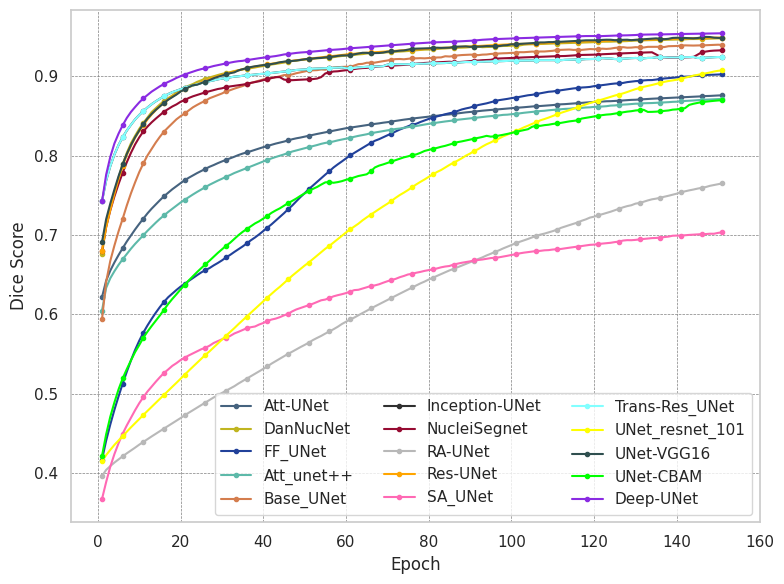

In [4]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#
file_paths = [
    "/content/AttentionUNet_model_training_history.pkl",
    "/content/DanNucNet_model_training_history.pkl",
    "/content/FF_UNet_model_training_history.pkl",
    "/content/att_unetpp_model_training_history.pkl",
    "/content/base_unet_training_history.pkl",
    "/content/inception_unet_training_history.pkl",
    "/content/nuclei_segnet_training_history.pkl",
    "/content/ra_unet_training_history.pkl",
    "/content/resunet_model_training_history.pkl",
    "/content/sa_unet_training_history.pkl",
    "/content/transres_unet_training_history.pkl",
    "/content/unet_resnet_101_model_training_history.pkl",
    "/content/unet_vgg16_model_training_history.pkl",
    "/content/unetcbam_model_training_history.pkl",
    "/content/deep_unet_training_history.pkl"
]

model_names = [
    "Att-UNet",
    "DanNucNet",
    "FF_UNet",
    "Att_unet++",
    "Base_UNet",
    "Inception-UNet",
    "NucleiSegnet",
    "RA-UNet",
    "Res-UNet",
    "SA_UNet",
    "Trans-Res_UNet",
    "UNet_resnet_101",
    "UNet-VGG16",
    "UNet-CBAM",
    "Deep-UNet"
]

def load_training_history(file_path):
    with open(file_path, 'rb') as file:
        history = pickle.load(file)
    return history

# Загрузка истории обучения для каждой модели
histories = [load_training_history(file_path) for file_path in file_paths]

# Определяем максимальное количество эпох среди всех моделей
max_epochs = max(len(history['dice_coef']) for history in histories)

# Создаем график
plt.figure(figsize=(8, 6))

colors = ['#46637F', '#C0B520', '#21419A', '#5DB9A9', '#D47D4E', '#303030', '#960B32', '#B8B8B8', '#FFA500', '#FF69B4', '#82FFFF', '#FFFF00', '#2F4F4F', '#00FF00', '#8A2BE2']
# Настройка стилей Seaborn с новой палитрой
sns.set(style="whitegrid", palette=sns.color_palette(colors))

for i, history in enumerate(histories):
    # Используем сглаживание с помощью numpy.convolve для улучшения визуализации
    smooth_dice_coef = np.convolve(history['dice_coef'], np.ones(10)/10, mode='valid')
    epochs = np.arange(1, len(smooth_dice_coef) + 1)

    # Заполняем NaN после завершения обучения
    extended_epochs = np.arange(1, max_epochs + 1)
    extended_smooth_dice_coef = np.full(max_epochs, np.nan)
    extended_smooth_dice_coef[:len(smooth_dice_coef)] = smooth_dice_coef

    plt.plot(extended_epochs, extended_smooth_dice_coef, 'o-', label=model_names[i], markersize=3, markevery=5, color=colors[i])


plt.xlabel('Epoch')
plt.ylabel('Dice Score')
plt.legend(ncol=3)

# Изменение цвета и стиля сетки
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Установка нужных меток по оси X
plt.xticks(np.arange(0, max_epochs + 1, 20))

plt.tight_layout()

# Отображение графика
plt.show()

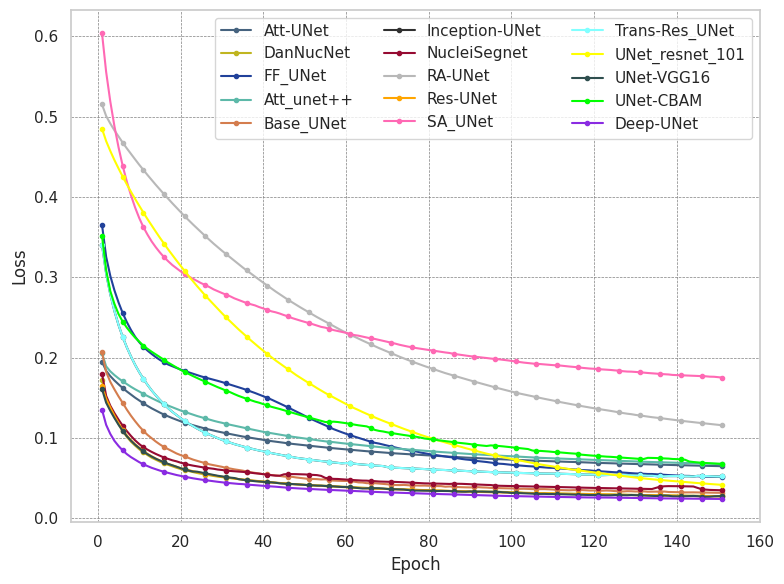

In [5]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

file_paths = [
    "/content/AttentionUNet_model_training_history.pkl",
    "/content/DanNucNet_model_training_history.pkl",
    "/content/FF_UNet_model_training_history.pkl",
    "/content/att_unetpp_model_training_history.pkl",
    "/content/base_unet_training_history.pkl",
    "/content/inception_unet_training_history.pkl",
    "/content/nuclei_segnet_training_history.pkl",
    "/content/ra_unet_training_history.pkl",
    "/content/resunet_model_training_history.pkl",
    "/content/sa_unet_training_history.pkl",
    "/content/transres_unet_training_history.pkl",
    "/content/unet_resnet_101_model_training_history.pkl",
    "/content/unet_vgg16_model_training_history.pkl",
    "/content/unetcbam_model_training_history.pkl",
    "/content/deep_unet_training_history.pkl"
]

model_names = [
    "Att-UNet",
    "DanNucNet",
    "FF_UNet",
    "Att_unet++",
    "Base_UNet",
    "Inception-UNet",
    "NucleiSegnet",
    "RA-UNet",
    "Res-UNet",
    "SA_UNet",
    "Trans-Res_UNet",
    "UNet_resnet_101",
    "UNet-VGG16",
    "UNet-CBAM",
    "Deep-UNet"
]

def load_training_history(file_path):
    with open(file_path, 'rb') as file:
        history = pickle.load(file)
    return history

# Загрузка истории обучения для каждой модели
histories = [load_training_history(file_path) for file_path in file_paths]

# Определяем максимальное количество эпох среди всех моделей
max_epochs = max(len(history['loss']) for history in histories)

#
plt.figure(figsize=(8, 6))

colors = ['#46637F', '#C0B520', '#21419A', '#5DB9A9', '#D47D4E', '#303030', '#960B32', '#B8B8B8', '#FFA500', '#FF69B4', '#82FFFF', '#FFFF00', '#2F4F4F', '#00FF00', '#8A2BE2']

sns.set(style="whitegrid", palette=sns.color_palette(colors))

for i, history in enumerate(histories):
    #
    smooth_loss = np.convolve(history['loss'], np.ones(10)/10, mode='valid')
    epochs = np.arange(1, len(smooth_loss) + 1)

    #
    extended_epochs = np.arange(1, max_epochs + 1)
    extended_smooth_loss = np.full(max_epochs, np.nan)
    extended_smooth_loss[:len(smooth_loss)] = smooth_loss

    plt.plot(extended_epochs, extended_smooth_loss, 'o-', label=model_names[i], markersize=3, markevery=5, color=colors[i])

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(ncol=3)

# Изменение цвета и стиля сетки
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Установка нужных меток по оси X
plt.xticks(np.arange(0, max_epochs + 1, 20))

plt.tight_layout()

# Отображение графика
plt.show()

**Performance results from the CryoNuSeg dataset**

In [1]:
!cp /content/drive/MyDrive/2-CCryNuSeG/pkl_history/AttentionUNet_model_training_history.pkl /content
!cp /content/drive/MyDrive/2-CCryNuSeG/pkl_history/DanNucNet_model_training_history.pkl /content
!cp /content/drive/MyDrive/2-CCryNuSeG/pkl_history/FF_UNet_model_training_history.pkl /content
!cp /content/drive/MyDrive/2-CCryNuSeG/pkl_history/att_unetpp_model_training_history.pkl /content
!cp /content/drive/MyDrive/2-CCryNuSeG/pkl_history/base_unet_training_history.pkl /content
!cp /content/drive/MyDrive/2-CCryNuSeG/pkl_history/deep_unet_training_history.pkl /content
!cp /content/drive/MyDrive/2-CCryNuSeG/pkl_history/inception_unet_training_history.pkl /content
!cp /content/drive/MyDrive/2-CCryNuSeG/pkl_history/nuclei_segnet_training_history.pkl /content
!cp /content/drive/MyDrive/2-CCryNuSeG/pkl_history/ra_unet_training_history.pkl /content
!cp /content/drive/MyDrive/2-CCryNuSeG/pkl_history/sa_unet_training_history.pkl /content
!cp /content/drive/MyDrive/2-CCryNuSeG/pkl_history/transres_unet_training_history.pkl /content
!cp /content/drive/MyDrive/2-CCryNuSeG/pkl_history/unet_resnet_101_model_training_history.pkl /content
!cp /content/drive/MyDrive/2-CCryNuSeG/pkl_history/unet_vgg16_model_training_history.pkl /content
!cp /content/drive/MyDrive/2-CCryNuSeG/pkl_history/unetcbam_model_training_history.pkl /content
!cp /content/drive/MyDrive/2-CCryNuSeG/pkl_history/resunet_model_training_history.pkl /content

In [2]:
import pickle
from tabulate import tabulate

file_paths = [
    "/content/unetcbam_model_training_history.pkl",
    "/content/unet_vgg16_model_training_history.pkl",
    "/content/unet_resnet_101_model_training_history.pkl",
    "/content/transres_unet_training_history.pkl",
    "/content/sa_unet_training_history.pkl",
    "/content/resunet_model_training_history.pkl",
    "/content/ra_unet_training_history.pkl",
    "/content/nuclei_segnet_training_history.pkl",
    "/content/inception_unet_training_history.pkl",
    "/content/deep_unet_training_history.pkl",
    "/content/base_unet_training_history.pkl",
    "/content/att_unetpp_model_training_history.pkl",
    "/content/FF_UNet_model_training_history.pkl",
    "/content/DanNucNet_model_training_history.pkl",
    "/content/AttentionUNet_model_training_history.pkl"
]

model_names = [
    "unetcbam_model",
    "unet_vgg16_model",
    "unet_resnet_101_model",
    "transres_unet",
    "sa_unet",
    "resunet_model",
    "ra_unet",
    "nuclei_segnet",
    "inception_unet",
    "deep_unet",
    "base_unet",
    "att_unetpp_model",
    "FF_UNet_model",
    "DanNucNet_model",
    "AttentionUNet_model"
]

models_data = []

for file_path in file_paths:
    with open(file_path, 'rb') as file:
        history = pickle.load(file)
        models_data.append(history)

results = []

for i, model_data in enumerate(models_data):
    model_name = model_names[i]
    data = [
        model_name,
        model_data['loss'][-1],
        model_data['accuracy'][-1],
        model_data['dice_coef'][-1],
        model_data['f1_score'][-1],
        model_data['recall'][-1],
        model_data['precision'][-1],
        model_data['mean_iou'][-1],
        model_data['sensitivity'][-1]
    ]
    results.append(data)

headers = [
    "Model Name",
    "Loss",
    "Accuracy",
    "Dice Coef",
    "F1 Score",
    "Recall",
    "Precision",
    "Mean IOU",
    "Sensitivity"
]

table = tabulate(results, headers, tablefmt="pretty")
print(table)

+-----------------------+---------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|      Model Name       |        Loss         |      Accuracy      |     Dice Coef      |      F1 Score      |       Recall       |     Precision      |      Mean IOU      |    Sensitivity     |
+-----------------------+---------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|    unetcbam_model     | 0.08401168882846832 | 0.9225715398788452 | 0.8986159563064575 | 0.8649682998657227 | 0.8381994366645813 | 0.8935993313789368 | 0.7965995073318481 | 0.8381994366645813 |
|   unet_vgg16_model    | 0.06308040767908096 | 0.9282103776931763 | 0.9222952723503113 | 0.8804251551628113 | 0.8545991778373718 | 0.9079238772392273 | 0.8200818300247192 | 0.8545991778373718 |
| unet_resnet_101_model |

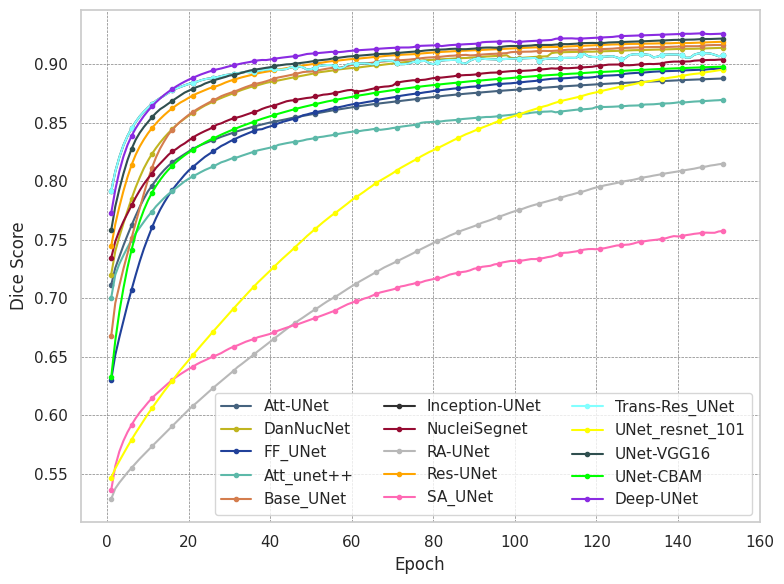

In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#
file_paths = [
    "/content/AttentionUNet_model_training_history.pkl",
    "/content/DanNucNet_model_training_history.pkl",
    "/content/FF_UNet_model_training_history.pkl",
    "/content/att_unetpp_model_training_history.pkl",
    "/content/base_unet_training_history.pkl",
    "/content/inception_unet_training_history.pkl",
    "/content/nuclei_segnet_training_history.pkl",
    "/content/ra_unet_training_history.pkl",
    "/content/resunet_model_training_history.pkl",
    "/content/sa_unet_training_history.pkl",
    "/content/transres_unet_training_history.pkl",
    "/content/unet_resnet_101_model_training_history.pkl",
    "/content/unet_vgg16_model_training_history.pkl",
    "/content/unetcbam_model_training_history.pkl",
    "/content/deep_unet_training_history.pkl"
]

model_names = [
    "Att-UNet",
    "DanNucNet",
    "FF_UNet",
    "Att_unet++",
    "Base_UNet",
    "Inception-UNet",
    "NucleiSegnet",
    "RA-UNet",
    "Res-UNet",
    "SA_UNet",
    "Trans-Res_UNet",
    "UNet_resnet_101",
    "UNet-VGG16",
    "UNet-CBAM",
    "Deep-UNet"
]

def load_training_history(file_path):
    with open(file_path, 'rb') as file:
        history = pickle.load(file)
    return history

# Загрузка истории обучения для каждой модели
histories = [load_training_history(file_path) for file_path in file_paths]

# Определяем максимальное количество эпох среди всех моделей
max_epochs = max(len(history['dice_coef']) for history in histories)

# Создаем график
plt.figure(figsize=(8, 6))

colors = ['#46637F', '#C0B520', '#21419A', '#5DB9A9', '#D47D4E', '#303030', '#960B32', '#B8B8B8', '#FFA500', '#FF69B4', '#82FFFF', '#FFFF00', '#2F4F4F', '#00FF00', '#8A2BE2']
# Настройка стилей Seaborn с новой палитрой
sns.set(style="whitegrid", palette=sns.color_palette(colors))

for i, history in enumerate(histories):
    # Используем сглаживание с помощью numpy.convolve для улучшения визуализации
    smooth_dice_coef = np.convolve(history['dice_coef'], np.ones(10)/10, mode='valid')
    epochs = np.arange(1, len(smooth_dice_coef) + 1)

    # Заполняем NaN после завершения обучения
    extended_epochs = np.arange(1, max_epochs + 1)
    extended_smooth_dice_coef = np.full(max_epochs, np.nan)
    extended_smooth_dice_coef[:len(smooth_dice_coef)] = smooth_dice_coef

    plt.plot(extended_epochs, extended_smooth_dice_coef, 'o-', label=model_names[i], markersize=3, markevery=5, color=colors[i])


plt.xlabel('Epoch')
plt.ylabel('Dice Score')
plt.legend(ncol=3)

# Изменение цвета и стиля сетки
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Установка нужных меток по оси X
plt.xticks(np.arange(0, max_epochs + 1, 20))

plt.tight_layout()

# Отображение графика
plt.show()

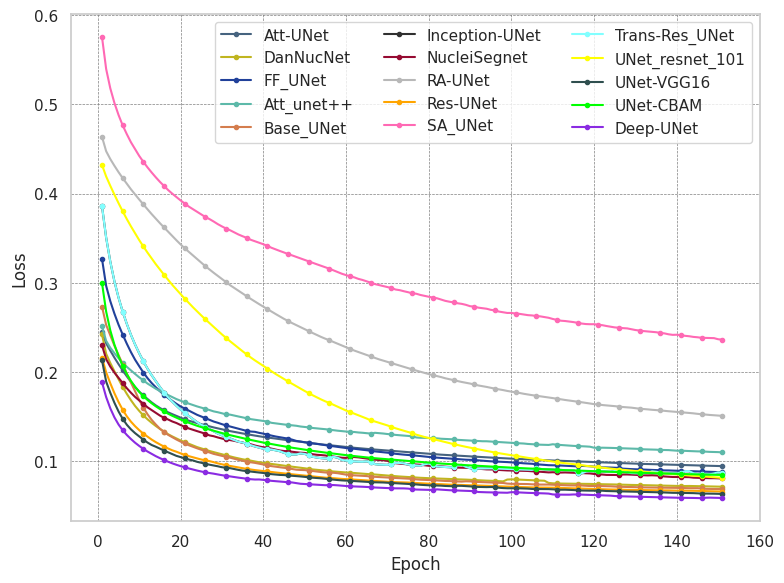

In [4]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

file_paths = [
    "/content/AttentionUNet_model_training_history.pkl",
    "/content/DanNucNet_model_training_history.pkl",
    "/content/FF_UNet_model_training_history.pkl",
    "/content/att_unetpp_model_training_history.pkl",
    "/content/base_unet_training_history.pkl",
    "/content/inception_unet_training_history.pkl",
    "/content/nuclei_segnet_training_history.pkl",
    "/content/ra_unet_training_history.pkl",
    "/content/resunet_model_training_history.pkl",
    "/content/sa_unet_training_history.pkl",
    "/content/transres_unet_training_history.pkl",
    "/content/unet_resnet_101_model_training_history.pkl",
    "/content/unet_vgg16_model_training_history.pkl",
    "/content/unetcbam_model_training_history.pkl",
    "/content/deep_unet_training_history.pkl"
]

model_names = [
    "Att-UNet",
    "DanNucNet",
    "FF_UNet",
    "Att_unet++",
    "Base_UNet",
    "Inception-UNet",
    "NucleiSegnet",
    "RA-UNet",
    "Res-UNet",
    "SA_UNet",
    "Trans-Res_UNet",
    "UNet_resnet_101",
    "UNet-VGG16",
    "UNet-CBAM",
    "Deep-UNet"
]

def load_training_history(file_path):
    with open(file_path, 'rb') as file:
        history = pickle.load(file)
    return history

# Загрузка истории обучения для каждой модели
histories = [load_training_history(file_path) for file_path in file_paths]

# Определяем максимальное количество эпох среди всех моделей
max_epochs = max(len(history['loss']) for history in histories)

#
plt.figure(figsize=(8, 6))

colors = ['#46637F', '#C0B520', '#21419A', '#5DB9A9', '#D47D4E', '#303030', '#960B32', '#B8B8B8', '#FFA500', '#FF69B4', '#82FFFF', '#FFFF00', '#2F4F4F', '#00FF00', '#8A2BE2']

sns.set(style="whitegrid", palette=sns.color_palette(colors))

for i, history in enumerate(histories):
    #
    smooth_loss = np.convolve(history['loss'], np.ones(10)/10, mode='valid')
    epochs = np.arange(1, len(smooth_loss) + 1)

    #
    extended_epochs = np.arange(1, max_epochs + 1)
    extended_smooth_loss = np.full(max_epochs, np.nan)
    extended_smooth_loss[:len(smooth_loss)] = smooth_loss

    plt.plot(extended_epochs, extended_smooth_loss, 'o-', label=model_names[i], markersize=3, markevery=5, color=colors[i])

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(ncol=3)

# Изменение цвета и стиля сетки
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Установка нужных меток по оси X
plt.xticks(np.arange(0, max_epochs + 1, 20))

plt.tight_layout()

# Отображение графика
plt.show()

**Performance results from the NulnsSeg dataset**

In [1]:
!cp "/content/drive/MyDrive/5-НулнсСег/pkl_history/AttentionUNet_model_training_history.pkl" .
!cp "/content/drive/MyDrive/5-НулнсСег/pkl_history/DanNucNet_model_training_history.pkl" .
!cp "/content/drive/MyDrive/5-НулнсСег/pkl_history/FF_UNet_model_training_history.pkl" .
!cp "/content/drive/MyDrive/5-НулнсСег/pkl_history/att_unetpp_model_training_history.pkl" .
!cp "/content/drive/MyDrive/5-НулнсСег/pkl_history/base_unet_training_history.pkl" .
!cp "/content/drive/MyDrive/5-НулнсСег/pkl_history/deep_unet_training_history.pkl" .
!cp "/content/drive/MyDrive/5-НулнсСег/pkl_history/inception_unet_training_history.pkl" .
!cp "/content/drive/MyDrive/5-НулнсСег/pkl_history/nuclei_segnet_training_history.pkl" .
!cp "/content/drive/MyDrive/5-НулнсСег/pkl_history/ra_unet_training_history.pkl" .
!cp "/content/drive/MyDrive/5-НулнсСег/pkl_history/resunet_model_training_history.pkl" .
!cp "/content/drive/MyDrive/5-НулнсСег/pkl_history/sa_unet_training_history.pkl" .
!cp "/content/drive/MyDrive/5-НулнсСег/pkl_history/transres_unet_training_history.pkl" .
!cp "/content/drive/MyDrive/5-НулнсСег/pkl_history/unet_resnet_101_model_training_history.pkl" .
!cp "/content/drive/MyDrive/5-НулнсСег/pkl_history/unet_vgg16_model_training_history.pkl" .
!cp "/content/drive/MyDrive/5-НулнсСег/pkl_history/unetcbam_model_training_history.pkl" .

In [2]:
import pickle
from tabulate import tabulate

file_paths = [
    "/content/unetcbam_model_training_history.pkl",
    "/content/unet_vgg16_model_training_history.pkl",
    "/content/unet_resnet_101_model_training_history.pkl",
    "/content/transres_unet_training_history.pkl",
    "/content/sa_unet_training_history.pkl",
    "/content/resunet_model_training_history.pkl",
    "/content/ra_unet_training_history.pkl",
    "/content/nuclei_segnet_training_history.pkl",
    "/content/inception_unet_training_history.pkl",
    "/content/deep_unet_training_history.pkl",
    "/content/base_unet_training_history.pkl",
    "/content/att_unetpp_model_training_history.pkl",
    "/content/FF_UNet_model_training_history.pkl",
    "/content/DanNucNet_model_training_history.pkl",
    "/content/AttentionUNet_model_training_history.pkl"
]

model_names = [
    "unetcbam_model",
    "unet_vgg16_model",
    "unet_resnet_101_model",
    "transres_unet",
    "sa_unet",
    "resunet_model",
    "ra_unet",
    "nuclei_segnet",
    "inception_unet",
    "deep_unet",
    "base_unet",
    "att_unetpp_model",
    "FF_UNet_model",
    "DanNucNet_model",
    "AttentionUNet_model"
]

models_data = []

for file_path in file_paths:
    with open(file_path, 'rb') as file:
        history = pickle.load(file)
        models_data.append(history)

results = []

for i, model_data in enumerate(models_data):
    model_name = model_names[i]
    data = [
        model_name,
        model_data['loss'][-1],
        model_data['accuracy'][-1],
        model_data['dice_coef'][-1],
        model_data['f1_score'][-1],
        model_data['recall'][-1],
        model_data['precision'][-1],
        model_data['mean_iou'][-1],
        model_data['sensitivity'][-1]
    ]
    results.append(data)

headers = [
    "Model Name",
    "Loss",
    "Accuracy",
    "Dice Coef",
    "F1 Score",
    "Recall",
    "Precision",
    "Mean IOU",
    "Sensitivity"
]

table = tabulate(results, headers, tablefmt="pretty")
print(table)

+-----------------------+----------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|      Model Name       |         Loss         |      Accuracy      |     Dice Coef      |      F1 Score      |       Recall       |     Precision      |      Mean IOU      |    Sensitivity     |
+-----------------------+----------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|    unetcbam_model     | 0.028128379955887794 | 0.9748188853263855 | 0.9359196424484253 | 0.9160871505737305 |  0.8989297747612   | 0.9339891672134399 | 0.8685328364372253 |  0.8989297747612   |
|   unet_vgg16_model    | 0.019497983157634735 | 0.9771219491958618 | 0.9543226361274719 | 0.9277731776237488 | 0.9113680124282837 | 0.9448156356811523 | 0.8874551057815552 | 0.9113680124282837 |
| unet_resnet_101_mo

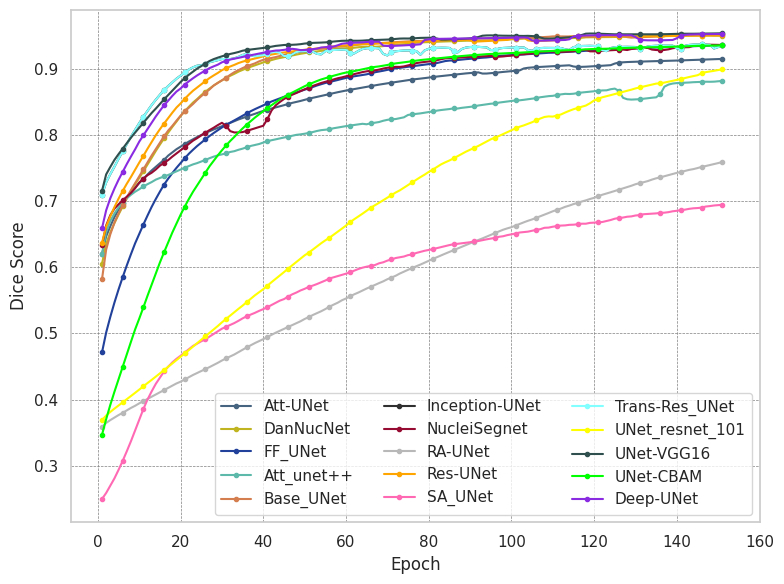

In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#
file_paths = [
    "/content/AttentionUNet_model_training_history.pkl",
    "/content/DanNucNet_model_training_history.pkl",
    "/content/FF_UNet_model_training_history.pkl",
    "/content/att_unetpp_model_training_history.pkl",
    "/content/base_unet_training_history.pkl",
    "/content/inception_unet_training_history.pkl",
    "/content/nuclei_segnet_training_history.pkl",
    "/content/ra_unet_training_history.pkl",
    "/content/resunet_model_training_history.pkl",
    "/content/sa_unet_training_history.pkl",
    "/content/transres_unet_training_history.pkl",
    "/content/unet_resnet_101_model_training_history.pkl",
    "/content/unet_vgg16_model_training_history.pkl",
    "/content/unetcbam_model_training_history.pkl",
    "/content/deep_unet_training_history.pkl"
]

model_names = [
    "Att-UNet",
    "DanNucNet",
    "FF_UNet",
    "Att_unet++",
    "Base_UNet",
    "Inception-UNet",
    "NucleiSegnet",
    "RA-UNet",
    "Res-UNet",
    "SA_UNet",
    "Trans-Res_UNet",
    "UNet_resnet_101",
    "UNet-VGG16",
    "UNet-CBAM",
    "Deep-UNet"
]

def load_training_history(file_path):
    with open(file_path, 'rb') as file:
        history = pickle.load(file)
    return history

# Загрузка истории обучения для каждой модели
histories = [load_training_history(file_path) for file_path in file_paths]

# Определяем максимальное количество эпох среди всех моделей
max_epochs = max(len(history['dice_coef']) for history in histories)

# Создаем график
plt.figure(figsize=(8, 6))

colors = ['#46637F', '#C0B520', '#21419A', '#5DB9A9', '#D47D4E', '#303030', '#960B32', '#B8B8B8', '#FFA500', '#FF69B4', '#82FFFF', '#FFFF00', '#2F4F4F', '#00FF00', '#8A2BE2']
# Настройка стилей Seaborn с новой палитрой
sns.set(style="whitegrid", palette=sns.color_palette(colors))

for i, history in enumerate(histories):
    # Используем сглаживание с помощью numpy.convolve для улучшения визуализации
    smooth_dice_coef = np.convolve(history['dice_coef'], np.ones(10)/10, mode='valid')
    epochs = np.arange(1, len(smooth_dice_coef) + 1)

    # Заполняем NaN после завершения обучения
    extended_epochs = np.arange(1, max_epochs + 1)
    extended_smooth_dice_coef = np.full(max_epochs, np.nan)
    extended_smooth_dice_coef[:len(smooth_dice_coef)] = smooth_dice_coef

    plt.plot(extended_epochs, extended_smooth_dice_coef, 'o-', label=model_names[i], markersize=3, markevery=5, color=colors[i])


plt.xlabel('Epoch')
plt.ylabel('Dice Score')
plt.legend(ncol=3)

# Изменение цвета и стиля сетки
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Установка нужных меток по оси X
plt.xticks(np.arange(0, max_epochs + 1, 20))

plt.tight_layout()

# Отображение графика
plt.show()

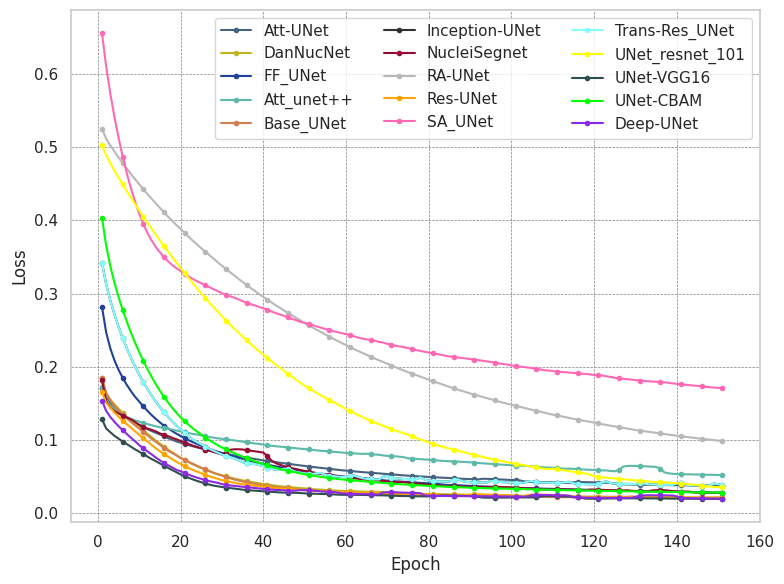

In [4]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

file_paths = [
    "/content/AttentionUNet_model_training_history.pkl",
    "/content/DanNucNet_model_training_history.pkl",
    "/content/FF_UNet_model_training_history.pkl",
    "/content/att_unetpp_model_training_history.pkl",
    "/content/base_unet_training_history.pkl",
    "/content/inception_unet_training_history.pkl",
    "/content/nuclei_segnet_training_history.pkl",
    "/content/ra_unet_training_history.pkl",
    "/content/resunet_model_training_history.pkl",
    "/content/sa_unet_training_history.pkl",
    "/content/transres_unet_training_history.pkl",
    "/content/unet_resnet_101_model_training_history.pkl",
    "/content/unet_vgg16_model_training_history.pkl",
    "/content/unetcbam_model_training_history.pkl",
    "/content/deep_unet_training_history.pkl"
]

model_names = [
    "Att-UNet",
    "DanNucNet",
    "FF_UNet",
    "Att_unet++",
    "Base_UNet",
    "Inception-UNet",
    "NucleiSegnet",
    "RA-UNet",
    "Res-UNet",
    "SA_UNet",
    "Trans-Res_UNet",
    "UNet_resnet_101",
    "UNet-VGG16",
    "UNet-CBAM",
    "Deep-UNet"
]

def load_training_history(file_path):
    with open(file_path, 'rb') as file:
        history = pickle.load(file)
    return history

# Загрузка истории обучения для каждой модели
histories = [load_training_history(file_path) for file_path in file_paths]

# Определяем максимальное количество эпох среди всех моделей
max_epochs = max(len(history['loss']) for history in histories)

#
plt.figure(figsize=(8, 6))

colors = ['#46637F', '#C0B520', '#21419A', '#5DB9A9', '#D47D4E', '#303030', '#960B32', '#B8B8B8', '#FFA500', '#FF69B4', '#82FFFF', '#FFFF00', '#2F4F4F', '#00FF00', '#8A2BE2']

sns.set(style="whitegrid", palette=sns.color_palette(colors))

for i, history in enumerate(histories):
    #
    smooth_loss = np.convolve(history['loss'], np.ones(10)/10, mode='valid')
    epochs = np.arange(1, len(smooth_loss) + 1)

    #
    extended_epochs = np.arange(1, max_epochs + 1)
    extended_smooth_loss = np.full(max_epochs, np.nan)
    extended_smooth_loss[:len(smooth_loss)] = smooth_loss

    plt.plot(extended_epochs, extended_smooth_loss, 'o-', label=model_names[i], markersize=3, markevery=5, color=colors[i])

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(ncol=3)

# Изменение цвета и стиля сетки
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Установка нужных меток по оси X
plt.xticks(np.arange(0, max_epochs + 1, 20))

plt.tight_layout()

# Отображение графика
plt.show()

**Performance results from the Bowl 2018 dataset**

In [1]:
!cp /content/drive/MyDrive/1-Bowl_2018/pkl_history/AttentionUNet_model_training_history.pkl /content/
!cp /content/drive/MyDrive/1-Bowl_2018/pkl_history/DanNucNet_model_training_history.pkl /content/
!cp /content/drive/MyDrive/1-Bowl_2018/pkl_history/FF_UNet_model_training_history.pkl /content/
!cp /content/drive/MyDrive/1-Bowl_2018/pkl_history/att_unetpp_model_training_history.pkl /content/
!cp /content/drive/MyDrive/1-Bowl_2018/pkl_history/base_unet_training_history.pkl /content/
!cp /content/drive/MyDrive/1-Bowl_2018/pkl_history/inception_unet_training_history.pkl /content/
!cp /content/drive/MyDrive/1-Bowl_2018/pkl_history/nuclei_segnet_training_history.pkl /content/
!cp /content/drive/MyDrive/1-Bowl_2018/pkl_history/ra_unet_training_history.pkl /content/
!cp /content/drive/MyDrive/1-Bowl_2018/pkl_history/resunet_model_training_history.pkl /content/
!cp /content/drive/MyDrive/1-Bowl_2018/pkl_history/sa_unet_training_history.pkl /content/
!cp /content/drive/MyDrive/1-Bowl_2018/transres_unet_training_history.pkl /content/
!cp /content/drive/MyDrive/1-Bowl_2018/pkl_history/unet_resnet_101_model_training_history.pkl /content/
!cp /content/drive/MyDrive/1-Bowl_2018/pkl_history/unet_vgg16_model_training_history.pkl /content/
!cp /content/drive/MyDrive/1-Bowl_2018/pkl_history/unetcbam_model_training_history.pkl /content/
!cp /content/drive/MyDrive/1-Bowl_2018/pkl_history/deep_unet_training_history.pkl /content/

In [2]:
import pickle
from tabulate import tabulate

file_paths = [
    "/content/unetcbam_model_training_history.pkl",
    "/content/unet_vgg16_model_training_history.pkl",
    "/content/unet_resnet_101_model_training_history.pkl",
    "/content/transres_unet_training_history.pkl",
    "/content/sa_unet_training_history.pkl",
    "/content/resunet_model_training_history.pkl",
    "/content/ra_unet_training_history.pkl",
    "/content/nuclei_segnet_training_history.pkl",
    "/content/inception_unet_training_history.pkl",
    "/content/deep_unet_training_history.pkl",
    "/content/base_unet_training_history.pkl",
    "/content/att_unetpp_model_training_history.pkl",
    "/content/FF_UNet_model_training_history.pkl",
    "/content/DanNucNet_model_training_history.pkl",
    "/content/AttentionUNet_model_training_history.pkl"
]

model_names = [
    "unetcbam_model",
    "unet_vgg16_model",
    "unet_resnet_101_model",
    "transres_unet",
    "sa_unet",
    "resunet_model",
    "ra_unet",
    "nuclei_segnet",
    "inception_unet",
    "deep_unet",
    "base_unet",
    "att_unetpp_model",
    "FF_UNet_model",
    "DanNucNet_model",
    "AttentionUNet_model"
]

models_data = []

for file_path in file_paths:
    with open(file_path, 'rb') as file:
        history = pickle.load(file)
        models_data.append(history)

results = []

for i, model_data in enumerate(models_data):
    model_name = model_names[i]
    data = [
        model_name,
        model_data['loss'][-1],
        model_data['accuracy'][-1],
        model_data['dice_coef'][-1],
        model_data['f1_score'][-1],
        model_data['recall'][-1],
        model_data['precision'][-1],
        model_data['mean_iou'][-1],
        model_data['sensitivity'][-1]
    ]
    results.append(data)

headers = [
    "Model Name",
    "Loss",
    "Accuracy",
    "Dice Coef",
    "F1 Score",
    "Recall",
    "Precision",
    "Mean IOU",
    "Sensitivity"
]

table = tabulate(results, headers, tablefmt="pretty")
print(table)

+-----------------------+----------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|      Model Name       |         Loss         |      Accuracy      |     Dice Coef      |      F1 Score      |       Recall       |     Precision      |      Mean IOU      |    Sensitivity     |
+-----------------------+----------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|    unetcbam_model     | 0.04861896485090256  | 0.8938822746276855 | 0.8964918851852417 | 0.9243040084838867 | 0.9213511347770691 | 0.9275350570678711 | 0.8571212887763977 | 0.9213511347770691 |
|   unet_vgg16_model    | 0.016394000500440598 | 0.9022554159164429 | 0.9695718884468079 | 0.978461742401123  | 0.9784433245658875 | 0.9784989356994629 | 0.9560238122940063 | 0.9784433245658875 |
| unet_resnet_101_mo

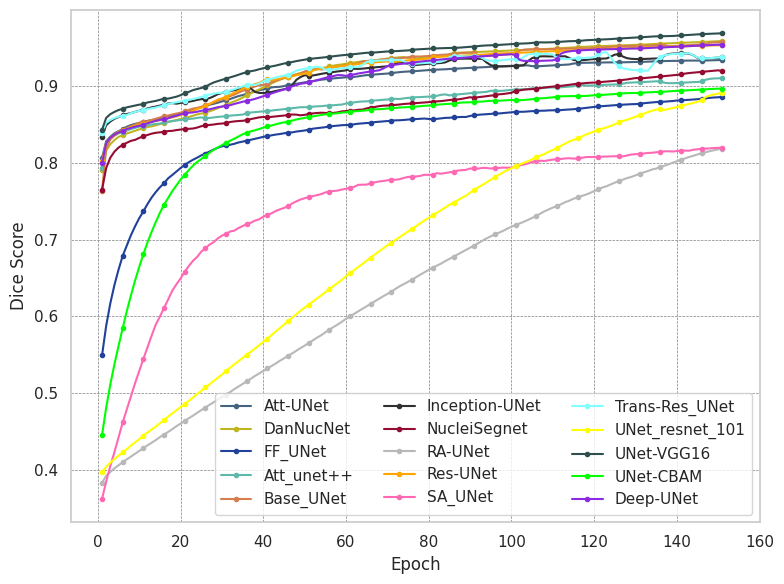

In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#
file_paths = [
    "/content/AttentionUNet_model_training_history.pkl",
    "/content/DanNucNet_model_training_history.pkl",
    "/content/FF_UNet_model_training_history.pkl",
    "/content/att_unetpp_model_training_history.pkl",
    "/content/base_unet_training_history.pkl",
    "/content/inception_unet_training_history.pkl",
    "/content/nuclei_segnet_training_history.pkl",
    "/content/ra_unet_training_history.pkl",
    "/content/resunet_model_training_history.pkl",
    "/content/sa_unet_training_history.pkl",
    "/content/transres_unet_training_history.pkl",
    "/content/unet_resnet_101_model_training_history.pkl",
    "/content/unet_vgg16_model_training_history.pkl",
    "/content/unetcbam_model_training_history.pkl",
    "/content/deep_unet_training_history.pkl"
]

model_names = [
    "Att-UNet",
    "DanNucNet",
    "FF_UNet",
    "Att_unet++",
    "Base_UNet",
    "Inception-UNet",
    "NucleiSegnet",
    "RA-UNet",
    "Res-UNet",
    "SA_UNet",
    "Trans-Res_UNet",
    "UNet_resnet_101",
    "UNet-VGG16",
    "UNet-CBAM",
    "Deep-UNet"
]

def load_training_history(file_path):
    with open(file_path, 'rb') as file:
        history = pickle.load(file)
    return history

# Загрузка истории обучения для каждой модели
histories = [load_training_history(file_path) for file_path in file_paths]

# Определяем максимальное количество эпох среди всех моделей
max_epochs = max(len(history['dice_coef']) for history in histories)

# Создаем график
plt.figure(figsize=(8, 6))

colors = ['#46637F', '#C0B520', '#21419A', '#5DB9A9', '#D47D4E', '#303030', '#960B32', '#B8B8B8', '#FFA500', '#FF69B4', '#82FFFF', '#FFFF00', '#2F4F4F', '#00FF00', '#8A2BE2']
# Настройка стилей Seaborn с новой палитрой
sns.set(style="whitegrid", palette=sns.color_palette(colors))

for i, history in enumerate(histories):
    # Используем сглаживание с помощью numpy.convolve для улучшения визуализации
    smooth_dice_coef = np.convolve(history['dice_coef'], np.ones(10)/10, mode='valid')
    epochs = np.arange(1, len(smooth_dice_coef) + 1)

    # Заполняем NaN после завершения обучения
    extended_epochs = np.arange(1, max_epochs + 1)
    extended_smooth_dice_coef = np.full(max_epochs, np.nan)
    extended_smooth_dice_coef[:len(smooth_dice_coef)] = smooth_dice_coef

    plt.plot(extended_epochs, extended_smooth_dice_coef, 'o-', label=model_names[i], markersize=3, markevery=5, color=colors[i])


plt.xlabel('Epoch')
plt.ylabel('Dice Score')
plt.legend(ncol=3)

# Изменение цвета и стиля сетки
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Установка нужных меток по оси X
plt.xticks(np.arange(0, max_epochs + 1, 20))

plt.tight_layout()

# Отображение графика
plt.show()

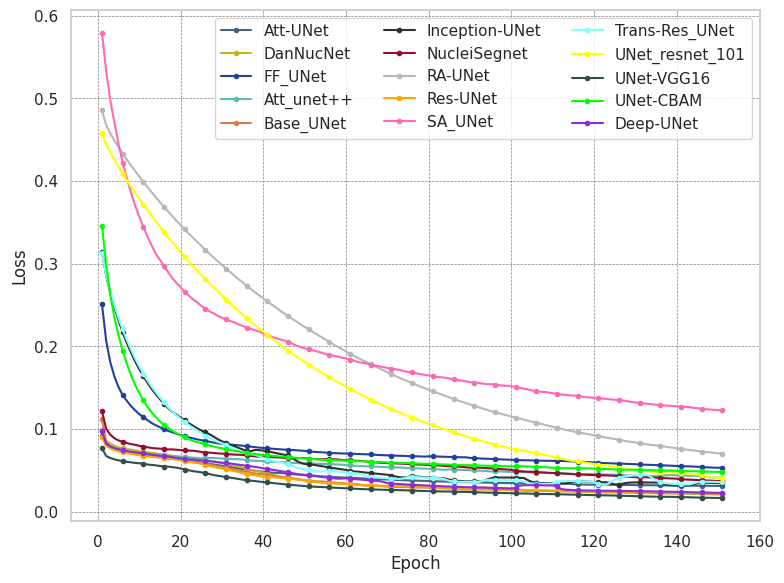

In [4]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

file_paths = [
    "/content/AttentionUNet_model_training_history.pkl",
    "/content/DanNucNet_model_training_history.pkl",
    "/content/FF_UNet_model_training_history.pkl",
    "/content/att_unetpp_model_training_history.pkl",
    "/content/base_unet_training_history.pkl",
    "/content/inception_unet_training_history.pkl",
    "/content/nuclei_segnet_training_history.pkl",
    "/content/ra_unet_training_history.pkl",
    "/content/resunet_model_training_history.pkl",
    "/content/sa_unet_training_history.pkl",
    "/content/transres_unet_training_history.pkl",
    "/content/unet_resnet_101_model_training_history.pkl",
    "/content/unet_vgg16_model_training_history.pkl",
    "/content/unetcbam_model_training_history.pkl",
    "/content/deep_unet_training_history.pkl"
]

model_names = [
    "Att-UNet",
    "DanNucNet",
    "FF_UNet",
    "Att_unet++",
    "Base_UNet",
    "Inception-UNet",
    "NucleiSegnet",
    "RA-UNet",
    "Res-UNet",
    "SA_UNet",
    "Trans-Res_UNet",
    "UNet_resnet_101",
    "UNet-VGG16",
    "UNet-CBAM",
    "Deep-UNet"
]

def load_training_history(file_path):
    with open(file_path, 'rb') as file:
        history = pickle.load(file)
    return history

# Загрузка истории обучения для каждой модели
histories = [load_training_history(file_path) for file_path in file_paths]

# Определяем максимальное количество эпох среди всех моделей
max_epochs = max(len(history['loss']) for history in histories)

#
plt.figure(figsize=(8, 6))

colors = ['#46637F', '#C0B520', '#21419A', '#5DB9A9', '#D47D4E', '#303030', '#960B32', '#B8B8B8', '#FFA500', '#FF69B4', '#82FFFF', '#FFFF00', '#2F4F4F', '#00FF00', '#8A2BE2']

sns.set(style="whitegrid", palette=sns.color_palette(colors))

for i, history in enumerate(histories):
    #
    smooth_loss = np.convolve(history['loss'], np.ones(10)/10, mode='valid')
    epochs = np.arange(1, len(smooth_loss) + 1)

    #
    extended_epochs = np.arange(1, max_epochs + 1)
    extended_smooth_loss = np.full(max_epochs, np.nan)
    extended_smooth_loss[:len(smooth_loss)] = smooth_loss

    plt.plot(extended_epochs, extended_smooth_loss, 'o-', label=model_names[i], markersize=3, markevery=5, color=colors[i])

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(ncol=3)

# Изменение цвета и стиля сетки
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Установка нужных меток по оси X
plt.xticks(np.arange(0, max_epochs + 1, 20))

plt.tight_layout()

# Отображение графика
plt.show()